In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# **Create new columns**

In [ ]:
df['department_na'] = df['department'].isna()
df['salary_range_na'] = df['salary_range'].isna()
df['location_na'] = df['location'].isna()
df['company_profile_na'] = df['company_profile'].isna()
df['requirements_na'] = df['requirements'].isna()
df['benefits_na'] = df['benefits'].isna()
df['employment_type_na'] = df['employment_type'].isna()
df['required_experience_na'] = df['required_experience'].isna()
df['required_education_na'] = df['required_education'].isna()
df['industry_na'] = df['industry'].isna()
df['function_na'] = df['function'].isna()


In [ ]:
df['is_fraud_industry'] = (df['industry'] == 'Oil & Energy') | (df['industry'] == 'Accounting') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Biotechnology') | (df['industry'] == 'Hospital & Health Care')
df['is_part_time'] = df['employment_type'] == 'Part-time'
df['is_high_school_cw'] = df['required_education'] == 'Some High School Coursework'
df['is_executive_entry'] = (df['required_experience'] == 'Executive') | (df['required_experience'] == 'Entry level')

In [ ]:
df['description_n']= df['description'].str.len()
df['company_profile_n']= df['company_profile'].str.len()
df['requirements_n']= df['requirements'].str.len()
df['benefits_n'] = df['benefits'].str.len()
df[['description_n','company_profile_n','requirements_n','benefits_n']] = df[['description_n','company_profile_n','requirements_n','benefits_n']].fillna(0)

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,True,False,False,False,False,False,905.0,885.0,852.0,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,False,False,False,False,False,False,2077.0,1286.0,1433.0,1292.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,True,True,False,False,False,False,355.0,879.0,1363.0,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,False,False,False,False,False,False,2600.0,614.0,1429.0,782.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,False,False,True,False,False,False,1520.0,1628.0,757.0,21.0


# **Create train df and test df**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
fraudulent_df = df[df['fraudulent'] == True]
train_fraud, test_fraud = train_test_split(fraudulent_df, train_size=0.7)
num_fraudulent = len(train_fraud)

nonfraud_df = df[df['fraudulent'] == False]
train_nonfraud, test_nonfraud = train_test_split(nonfraud_df, train_size=num_fraudulent)

train_df = pd.concat([train_fraud, train_nonfraud])
test_df = pd.concat([test_fraud, test_nonfraud])

In [ ]:
train_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
17810,17811,"Business Opportunity P/T,F/T Available","US, ,",NaN,NaN,NaN,We have the demand. We are looking for people ...,NaN,NaN,0,...,True,True,False,False,False,False,3009.0,0.0,0.0,0.0
11753,11754,Process Engineer,"US, CA, Bakersfield",Engineering,NaN,...,JOB DESCRIPTION: PROCESS ENGINEER Process Engi...,B.S. in Chemical Engineering required with 3 t...,Excellent wage/benefit package available.,0,...,False,False,True,False,False,False,931.0,1016.0,106.0,43.0
5688,5689,Call Center Representative,"US, TX, HOUSTON",NaN,1000-2000,NaN,Duties and Responsibilities:Answer Call Center...,QUALIFICATIONSHigh school diploma/GED required...,Compensation/benefits package includes:Compreh...,0,...,False,False,False,False,False,True,564.0,0.0,202.0,153.0
17635,17636,Data Entry Representative,"US, TX, AUSTIN",CSR CENTER,35000-40000,Our globally connected world has forced busine...,Responsible for reviewing details of tickets t...,HIGH SCHOOL DIPLOMAWORK GOOD ON A TEAM,"FULL TIMESALARY $35,000- $40,000HEALTH CARE, D...",0,...,False,False,False,False,False,False,1484.0,781.0,38.0,87.0
4737,4738,We need 25 Agents growing company-See below,"US, VA, stafford",NaN,NaN,NaN,We have the demand. We are looking for people ...,NaN,NaN,0,...,True,True,False,False,False,False,3009.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry_na,function_na,is_fraud_industry,is_part_time,is_high_school_cw,is_executive_entry,description_n,company_profile_n,requirements_n,benefits_n
17764,17765,"Admin Clerk,Office Assistant,Customer","US, VA, Virginia Beach",Administrative,22-61000,NaN,"Experienced, reliable team members are needed ...",6 months to a year experience working in a fa...,"Health, Dental, Life and AD&amp;D Insurance, ...",0,...,False,False,False,False,False,True,703.0,0.0,1037.0,197.0
5926,5927,Assistant Accountant,"AU, ,",NaN,25000-30000,NaN,Looking for an Assistant Accountant to join a ...,The ideal candidate will have the following sk...,The successful candidate must be highly self-m...,0,...,False,False,False,True,False,False,881.0,0.0,385.0,357.0
17538,17539,administrative assistance,US,admin,13-20,NaN,This position is for an Administrative Assista...,Must be proficient with OutlookSome knowledge ...,"Benefit includes: health and welfare coverage,...",0,...,False,False,True,False,False,True,501.0,0.0,160.0,520.0
5577,5578,Immediate Opening: Senior Storage Administrato...,"QA, DA,",Information Technology,NaN,NaN,Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skill Set required:Very Good Knowledge of all ...,NaN,0,...,True,True,False,False,False,False,1038.0,0.0,2279.0,0.0
6845,6846,Onshore Scaffolding Coordinator,"US, TX, Houston",NaN,NaN,NaN,DescriptionThe Onshore Scaffolding Coordinator...,Qualifications/Competencies· Must exhibit effe...,NaN,0,...,False,False,True,False,False,False,2332.0,0.0,899.0,0.0


In [ ]:
train_df['fraudulent'].value_counts()

1    606
0    606
Name: fraudulent, dtype: int64

In [ ]:
test_df['fraudulent'].value_counts()

0    16408
1      260
Name: fraudulent, dtype: int64

# **Create Logistic Regression**

## NA Values Logistic Regression

In [ ]:
X_train_na = train_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']] 
y_train_na = train_df['fraudulent']

X_test_na = test_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na',
                    'industry_na','function_na']]
y_test_na = test_df['fraudulent']

In [ ]:
from sklearn.linear_model import LogisticRegression

logr_na = LogisticRegression()

# Training my model
logr_na.fit(X_train_na, y_train_na)

# Predictions using only the testing data
preds = logr_na.predict(X_test_na)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     16408
           1       0.06      0.67      0.11       260

    accuracy                           0.83     16668
   macro avg       0.53      0.75      0.51     16668
weighted avg       0.98      0.83      0.89     16668



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_na, preds, normalize='true')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test_na, preds)
roc_auc

0.7529816599782471

## Features Logistic Regression

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'department_na', 'salary_range_na', 'location_na',
       'company_profile_na', 'requirements_na', 'benefits_na',
       'employment_type_na', 'required_experience_na', 'required_education_na',
       'industry_na', 'function_na', 'is_fraud_industry', 'is_part_time',
       'is_high_school_cw', 'is_executive_entry', 'description_n',
       'company_profile_n', 'requirements_n', 'benefits_n'],
      dtype='object')

In [ ]:
X_train_features = train_df[['is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry']] 
y_train_features = train_df['fraudulent']

X_test_features = test_df[['is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry']]
y_test_features = test_df['fraudulent']

In [ ]:
from sklearn.linear_model import LogisticRegression

logr_features = LogisticRegression()

# Training my model
logr_na.fit(X_train_features, y_train_features)

# Predictions using only the testing data
preds = logr_na.predict(X_test_features)

In [ ]:
print(classification_report(y_test_na, preds))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16408
           1       0.07      0.48      0.12       260

    accuracy                           0.89     16668
   macro avg       0.53      0.69      0.53     16668
weighted avg       0.98      0.89      0.93     16668



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test_features, preds)
roc_auc

0.6882182237557665

In [ ]:
confusion_matrix(y_test_na, preds, normalize='true')

array([[0.89182106, 0.10817894],
       [0.51538462, 0.48461538]])

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'department_na', 'salary_range_na', 'location_na',
       'company_profile_na', 'requirements_na', 'benefits_na',
       'employment_type_na', 'required_experience_na', 'required_education_na',
       'industry_na', 'function_na', 'is_fraud_industry', 'is_part_time',
       'is_high_school_cw', 'is_executive_entry', 'description_n',
       'company_profile_n', 'requirements_n', 'benefits_n'],
      dtype='object')

## Character Length Logistic Regression

In [ ]:
X_train_char_len = train_df[['description_n', 'company_profile_n','requirements_n', 'benefits_n']] 
y_train_char_len = train_df['fraudulent']

X_test_char_len = test_df[['description_n', 'company_profile_n','requirements_n', 'benefits_n']]
y_test_char_len = test_df['fraudulent']

In [ ]:
logr_char_length = LogisticRegression()

# Training my model
logr_char_length.fit(X_train_char_len, y_train_char_len)

# Predictions using only the testing data
preds = logr_char_length.predict(X_test_char_len)

In [ ]:
print(classification_report(y_test_char_len, preds))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     16408
           1       0.03      0.73      0.06       260

    accuracy                           0.62     16668
   macro avg       0.51      0.68      0.41     16668
weighted avg       0.98      0.62      0.75     16668



In [ ]:
confusion_matrix(y_test_na, preds, normalize='true')

array([[0.62122136, 0.37877864],
       [0.26538462, 0.73461538]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test_char_len, preds)
roc_auc

0.6779183700258786

## Combined Logistic Regression

In [ ]:
X_train = train_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na','industry_na','function_na', 
                    'is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry', 'description_n', 
                    'company_profile_n','requirements_n', 'benefits_n']] 
y_train = train_df['fraudulent']

X_test = test_df[['department_na','salary_range_na','location_na','company_profile_na','requirements_na','benefits_na',
                    'employment_type_na','required_experience_na','required_education_na','industry_na','function_na', 
                    'is_part_time', 'is_fraud_industry','is_high_school_cw', 'is_executive_entry', 'description_n', 
                    'company_profile_n','requirements_n', 'benefits_n']]
y_test = test_df['fraudulent']

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

# Training my model
logr.fit(X_train,y_train)

# Predictions using only the testing data
preds = logr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     16408
           1       0.06      0.83      0.11       260

    accuracy                           0.79     16668
   macro avg       0.53      0.81      0.50     16668
weighted avg       0.98      0.79      0.87     16668



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds, normalize='true')

array([[0.78985861, 0.21014139],
       [0.17307692, 0.82692308]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, preds)


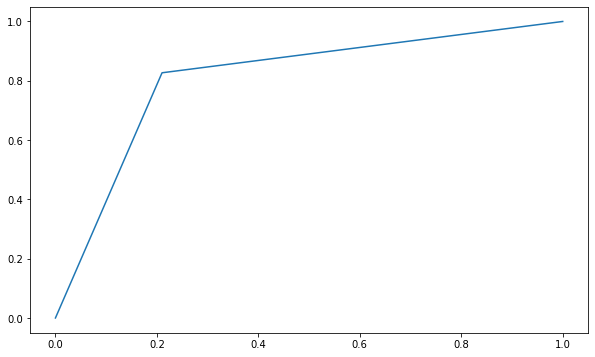

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.8083908412406706